In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0117.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0101.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0108.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0110.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0119.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0115.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0116.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0105.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0106.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0121.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0111.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0103.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0120.jpeg
/kaggle/input/covid19-image-dataset/Co

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [224, 224] 

train_path = '../input/covid19-image-dataset/Covid19-dataset/train'
valid_path = '../input/covid19-image-dataset/Covid19-dataset/test'

In [4]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


2022-03-23 22:38:44.220903: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-23 22:38:44.315455: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-23 22:38:44.316131: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-23 22:38:44.317206: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 0s 0us/step


In [5]:
for layer in vgg.layers:
  layer.trainable=False


In [6]:
folders=glob( '../input/covid19-image-dataset/Covid19-dataset/train/*')

In [7]:
x=Flatten()(vgg.output)

prediction=Dense(len(folders),activation='softmax')(x)


model = Model(inputs=vgg.input, outputs=prediction)


In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory('../input/covid19-image-dataset/Covid19-dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 251 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory('../input/covid19-image-dataset/Covid19-dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 66 images belonging to 3 classes.


In [13]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-03-23 22:38:49.829036: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-03-23 22:38:53.514370: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


8/8 [==============================] - 28s 2s/step - loss: 0.9638 - accuracy: 0.6056 - val_loss: 0.4659 - val_accuracy: 0.7727
Epoch 2/15
8/8 [==============================] - 13s 2s/step - loss: 0.3800 - accuracy: 0.8526 - val_loss: 0.5894 - val_accuracy: 0.7273
Epoch 3/15
8/8 [==============================] - 13s 2s/step - loss: 0.2414 - accuracy: 0.9124 - val_loss: 0.2045 - val_accuracy: 0.8939
Epoch 4/15
8/8 [==============================] - 14s 2s/step - loss: 0.1502 - accuracy: 0.9482 - val_loss: 0.1580 - val_accuracy: 0.9394
Epoch 5/15
8/8 [==============================] - 13s 2s/step - loss: 0.1186 - accuracy: 0.9482 - val_loss: 0.1225 - val_accuracy: 0.9848
Epoch 6/15
8/8 [==============================] - 13s 2s/step - loss: 0.1034 - accuracy: 0.9602 - val_loss: 0.1498 - val_accuracy: 0.9394
Epoch 7/15
8/8 [==============================] - 13s 2s/step - loss: 0.0905 - accuracy: 0.9761 - val_loss: 0.1304 - val_accuracy: 0.9545
Epoch 8/15
8/8 [=============================

In [14]:
r.history

{'loss': [0.9637683033943176,
  0.3800245523452759,
  0.24140219390392303,
  0.15016193687915802,
  0.11864393949508667,
  0.103447325527668,
  0.09046574681997299,
  0.07282235473394394,
  0.0704028308391571,
  0.06438934057950974,
  0.04694202169775963,
  0.052765898406505585,
  0.04145485907793045,
  0.037846412509679794,
  0.03024475648999214],
 'accuracy': [0.6055777072906494,
  0.8525896668434143,
  0.912350594997406,
  0.9482071995735168,
  0.9482071995735168,
  0.9601593613624573,
  0.9760956168174744,
  0.980079710483551,
  0.9760956168174744,
  0.980079710483551,
  0.9880478382110596,
  0.9880478382110596,
  0.9960159659385681,
  0.9960159659385681,
  0.9960159659385681],
 'val_loss': [0.4659188687801361,
  0.5893568992614746,
  0.20453572273254395,
  0.15800274908542633,
  0.12246556580066681,
  0.14982207119464874,
  0.13039198517799377,
  0.094613216817379,
  0.09510782361030579,
  0.0928545892238617,
  0.11672981083393097,
  0.09581094980239868,
  0.13807323575019836,
  0

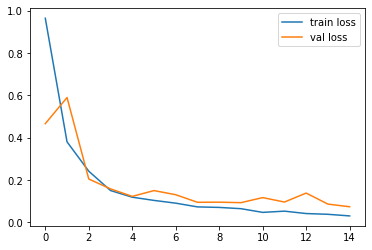

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

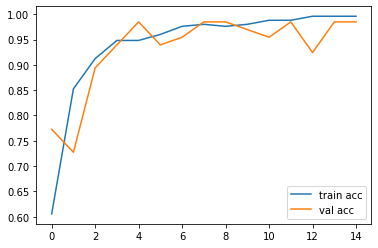

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [17]:
y_pred=model.predict(test_set)
y_pred

array([[2.3591993e-04, 7.1773881e-01, 2.8202528e-01],
       [6.2281953e-04, 2.1584468e-02, 9.7779274e-01],
       [3.6953357e-03, 9.7976112e-01, 1.6543493e-02],
       [9.9838746e-01, 9.1480411e-04, 6.9778250e-04],
       [3.0516121e-03, 9.9554622e-01, 1.4022343e-03],
       [3.0400814e-03, 2.1752587e-01, 7.7943403e-01],
       [9.9904352e-01, 4.0079595e-04, 5.5567641e-04],
       [2.5728335e-05, 9.3489355e-01, 6.5080754e-02],
       [4.1280422e-02, 3.2190727e-03, 9.5550048e-01],
       [9.7023273e-01, 1.6398923e-02, 1.3368273e-02],
       [2.1795186e-05, 2.6379344e-03, 9.9734026e-01],
       [5.0690494e-05, 7.0029449e-01, 2.9965481e-01],
       [6.2875552e-05, 9.9851674e-01, 1.4203943e-03],
       [5.1618752e-04, 1.7584586e-01, 8.2363790e-01],
       [9.1127244e-05, 9.9582160e-01, 4.0872232e-03],
       [9.3910471e-03, 2.2853187e-03, 9.8832357e-01],
       [7.7094692e-06, 9.1977942e-01, 8.0212951e-02],
       [4.6743393e-05, 1.2590711e-03, 9.9869424e-01],
       [6.5516186e-04, 8.549